In [93]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import xarray as xr
import numpy as np
import pandas as pd
import glob
import calendar
import seaborn as sns
import seaborn_image as isns

In [94]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

In [95]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Times")
sns.set_context(font_scale=0.8)

In [96]:
data_baseline = xr.open_mfdataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/FCO2/fco2_baseline_7.0_cropped.nc')

In [97]:
data_oae = xr.open_mfdataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/FCO2/fco2_OAE_7.0_cropped.nc')

In [98]:
data_baseline = data_baseline.fco2[0,:]
data_oae = data_oae.fco2[0,:]

In [99]:
data_baseline = data_baseline.to_dataset(name='fco2')
data_oae = data_oae.to_dataset(name='fco2')

In [100]:
dataframe_base = data_baseline.sel(time_counter=slice('2090', '2100'))

In [101]:
dataframe_oae = data_oae.sel(time_counter=slice('2090', '2100'))

### Averaged Annual Amplitude of ƒCO2 for the last ten years without OAE

In [102]:
fco2_max_base = dataframe_base.resample(time_counter='AS').max('time_counter')

In [103]:
fco2_min_base = dataframe_base.resample(time_counter='AS').min('time_counter')

In [104]:
fco2_amplitude_base = fco2_max_base['fco2'] - fco2_min_base['fco2']

In [105]:
fco2_amplitude_base = fco2_amplitude_base.to_dataset()

In [106]:
fco2_amplitude_base_map = fco2_amplitude_base.fco2.mean(dim=('time_counter'))

In [107]:
fco2_amplitude_base_map = fco2_amplitude_base_map.to_dataset()

/opt/anaconda3/envs/geomar/lib/python3.7/site-packages/dask/array/reductions.py:569: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/opt/anaconda3/envs/geomar/lib/python3.7/site-packages/dask/array/reductions.py:540: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)


Text(0.5, 1.06, 'ƒCO2 seasonal cycle change without OAE')

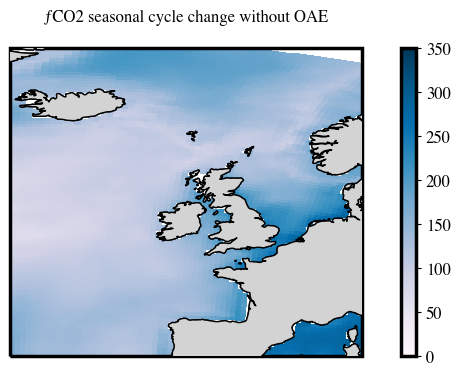

In [108]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

im=fco2_amplitude_base_map.fco2.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=False, vmin = 0, vmax = 350, cmap='PuBu'
)
ax.coastlines()
ax.set_extent([-25, 10, 40, 70])

cb = plt.colorbar(im, shrink=1)

for t in cb.ax.get_yticklabels():
     t.set_fontsize(12)

plt.title('ƒCO2 seasonal cycle change without OAE', fontname="Times", fontsize=12, y=1.06)

### Averaged Annual Amplitude of ƒCO2 for the last ten years with OAE

In [109]:
fco2_max_oae = dataframe_oae.resample(time_counter='AS').max('time_counter')

In [110]:
fco2_min_oae = dataframe_oae.resample(time_counter='AS').min('time_counter')

In [111]:
fco2_amplitude_oae = fco2_max_oae['fco2'] - fco2_min_oae['fco2']

In [112]:
fco2_amplitude_oae = fco2_amplitude_oae.to_dataset()

In [113]:
fco2_amplitude_oae_map = fco2_amplitude_oae.fco2.mean(dim=('time_counter'))

In [114]:
fco2_amplitude_oae_map = fco2_amplitude_oae_map.to_dataset()

/opt/anaconda3/envs/geomar/lib/python3.7/site-packages/dask/array/reductions.py:569: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/opt/anaconda3/envs/geomar/lib/python3.7/site-packages/dask/array/reductions.py:540: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)


Text(0.5, 1.06, 'ƒCO2 seasonal cycle change with OAE')

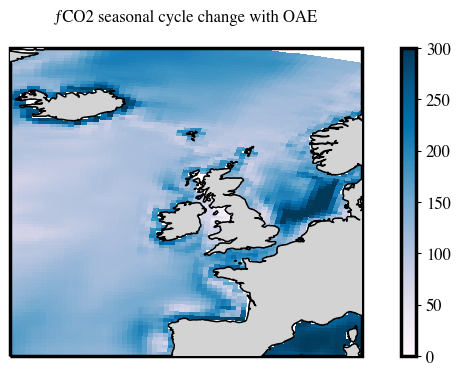

In [115]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

im=fco2_amplitude_oae_map.fco2.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=False, vmin = 0, vmax = 300, cmap='PuBu'
)
ax.coastlines()
ax.set_extent([-25, 10, 40, 70])

cb = plt.colorbar(im, shrink=1)

for t in cb.ax.get_yticklabels():
     t.set_fontsize(12)
        
plt.title('ƒCO2 seasonal cycle change with OAE', fontname="Times", fontsize=12, y=1.06)

### Δ ƒCO2 between Baseline and OAE scenario

In [116]:
fco2_amplitude_change = fco2_amplitude_oae - fco2_amplitude_base

In [117]:
fco2_amplitude_change_map = fco2_amplitude_change.fco2.mean(dim=('time_counter'))

In [118]:
fco2_amplitude_change_map = fco2_amplitude_change_map.to_dataset()

/opt/anaconda3/envs/geomar/lib/python3.7/site-packages/dask/array/reductions.py:569: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/opt/anaconda3/envs/geomar/lib/python3.7/site-packages/dask/array/reductions.py:540: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)


Text(0.5, 1.06, 'ƒCO2 seasonal cycle difference between with and without OAE')

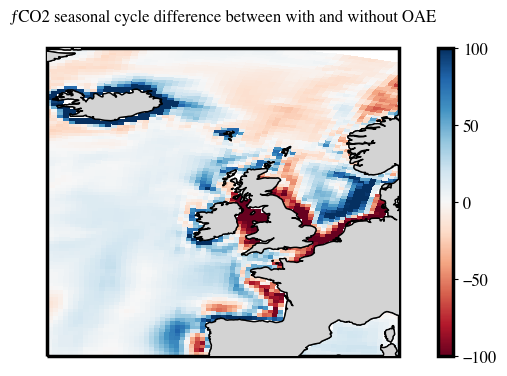

In [119]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

im=fco2_amplitude_change_map.fco2.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=False, vmin = -100, vmax = 100, cmap="RdBu"
)
ax.coastlines()
ax.set_extent([-25, 10, 40, 70])

cb = plt.colorbar(im, shrink=1)

for t in cb.ax.get_yticklabels():
     t.set_fontsize(12)

plt.title('ƒCO2 seasonal cycle difference between with and without OAE', fontname="Times", fontsize=12, y=1.06)

### Averaged Annual Amplitude of ƒCO2 over time

/opt/anaconda3/envs/geomar/lib/python3.7/site-packages/dask/array/reductions.py:569: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/opt/anaconda3/envs/geomar/lib/python3.7/site-packages/dask/array/reductions.py:540: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)
/opt/anaconda3/envs/geomar/lib/python3.7/site-packages/dask/array/reductions.py:569: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/opt/anaconda3/envs/geomar/lib/python3.7/site-packages/dask/array/reductions.py:540: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)
/opt/anaconda3/envs/geomar/lib/python3.7/site-packages/dask/array/reductions.py:569: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/opt/anaconda3/envs/geomar/lib/python3.7/site-packages/dask/array/reduction

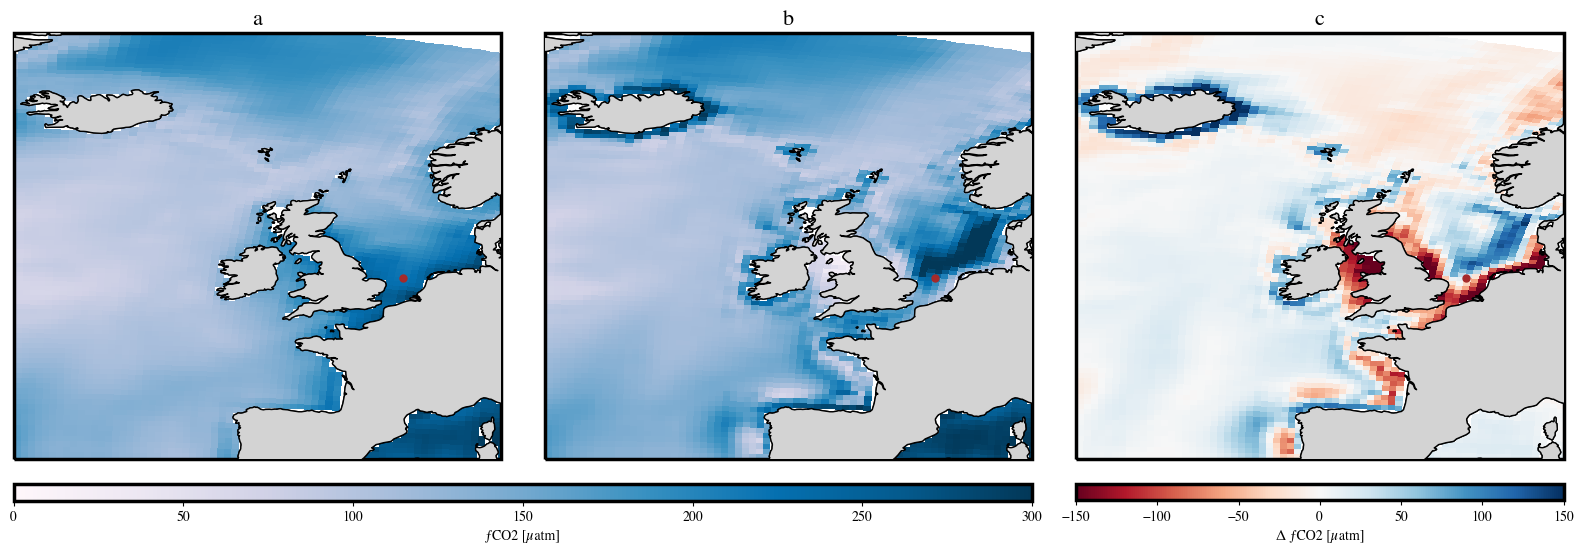

In [120]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20, 8))
plt.subplots_adjust(wspace=0.09, hspace=0.05)

im1 = fco2_amplitude_base_map.fco2.plot.pcolormesh(
        ax=ax1, x="nav_lon", y="nav_lat",
        vmin=0,
        vmax=300,
        cmap="PuBu",
        add_colorbar=False
    )
    
im2 = fco2_amplitude_oae_map.fco2.plot.pcolormesh(
        ax=ax2, x="nav_lon", y="nav_lat",
        vmin=0,
        vmax=300,
        cmap="PuBu",
        add_colorbar=False
    )
    
im3 = fco2_amplitude_change_map.fco2.plot.pcolormesh( 
        ax=ax3, x="nav_lon", y="nav_lat",
        vmin=-150,
        vmax=150,
        cmap="RdBu", 
        add_colorbar=False
    )
    
ax1.set_title("a", fontsize=16, y=1)
ax2.set_title("b", fontsize=16, y=1)
ax3.set_title("c", fontsize=16, y=1)    
    
ax1.coastlines()
ax1.set_extent([-25, 10, 40, 70])  
ax1.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

ax2.coastlines()
ax2.set_extent([-25, 10, 40, 70]) 
ax2.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

ax3.coastlines()
ax3.set_extent([-25, 10, 40, 70])
ax3.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

cbar = plt.colorbar(im1, ax = [ax1, ax2], aspect = 60, pad=0.04, location='bottom')
cbar.set_label('ƒCO2 [µatm]', fontsize=10)

cb3= plt.colorbar(im3,ax=ax3, aspect = 30, pad=0.04, location='bottom')
cb3.set_label('Δ ƒCO2 [µatm]', fontsize=10)
cb3.ax.yaxis.get_offset_text().set(size=10)

font_size = 10
cb3.ax.tick_params(labelsize=font_size)
cbar.ax.tick_params(labelsize=font_size)

pass

ax1.plot(3, 53, "o", color='brown', markersize=5)
ax2.plot(3, 53, "o", color='brown', markersize=5)
ax3.plot(3, 53, "o", color='brown', markersize=5)

#fig.suptitle('Seasonal Cycle Amplitude of ƒCO2 (average over the last decade)', fontname='Times', fontsize=15, y=0.81)
plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP3_7.0/FCO2/figs/FCO2_seasonal_cycletry.png')

### Amplitude at Location Point

In [121]:
fco2_base_sliced = dataframe_base.where((3 < dataframe_base.nav_lon) & (dataframe_base.nav_lon < 3.1) & (52 < dataframe_base.nav_lat) & (dataframe_base.nav_lat < 53), drop=True)
fco2_oae_sliced = dataframe_oae.where((3 < dataframe_oae.nav_lon) & (dataframe_oae.nav_lon < 3.1) & (52 < dataframe_oae.nav_lat) & (dataframe_oae.nav_lat < 53), drop=True)

In [122]:
fco2_max_base_slc = fco2_base_sliced.resample(time_counter='AS').max('time_counter')

In [123]:
fco2_min_base_slc = fco2_base_sliced.resample(time_counter='AS').min('time_counter')

In [124]:
fco2_amplitude_base_slc = fco2_max_base_slc['fco2'] - fco2_min_base_slc['fco2']

In [125]:
fco2_amplitude_base_slc = fco2_amplitude_base_slc.to_dataset(name='fco2')

In [126]:
fco2_max_base_slc = fco2_max_base_slc.fco2.mean(dim=('time_counter'))
fco2_min_base_slc = fco2_min_base_slc.fco2.mean(dim=('time_counter'))
fco2_amplitude_base_slc = fco2_amplitude_base_slc.fco2.mean(dim=('time_counter'))

In [127]:
fco2_max_oae_slc = fco2_oae_sliced.resample(time_counter='AS').max('time_counter')

In [128]:
fco2_min_oae_slc = fco2_oae_sliced.resample(time_counter='AS').min('time_counter')

In [129]:
fco2_amplitude_oae_slc = fco2_max_oae_slc['fco2'] - fco2_min_oae_slc['fco2']

In [130]:
fco2_amplitude_oae_slc = fco2_amplitude_oae_slc.to_dataset(name='fco2')

In [131]:
fco2_max_oae_slc = fco2_max_oae_slc.fco2.mean(dim=('time_counter'))
fco2_min_oae_slc = fco2_min_oae_slc.fco2.mean(dim=('time_counter'))
fco2_amplitude_oae_slc = fco2_amplitude_oae_slc.fco2.mean(dim=('time_counter'))

In [132]:
fco2_max_oae_slc = fco2_max_oae_slc.to_dataframe()
fco2_min_oae_slc = fco2_min_oae_slc.to_dataframe()